In [20]:
import pandas as pd

df = pd.read_csv("data/OGNT_processed.csv")
df.sample(8)

,Unnamed: 0,book,chapter,verse,word,lemma,trans,author
60427,60427,j,15,1,ο,ὁ,the/this/who,john
88240,88240,rom,11,25,αδελφοι,ἀδελφός,brother,paul
43389,43389,lk,17,20,αυτοις,αὐτός,he/she/it/self,luke
54310,54310,j,7,18,πεμψαντος,πέμπω,to send,john
99880,99880,2kor,8,24,και,καί,and,paul
88221,88221,rom,11,24,φυσιν,φύσις,nature,paul
6421,6421,mt,12,22,κωφος,κωφός,deaf/mute,matthew
61024,61024,j,16,7,δε,δέ,but/and,john


In [21]:
import numpy as np

print(f"Words total: {len(df["word"])}")
print(f"Unique words: {len(np.unique(df["word"]))}")
print(f"Unique lemmas: {len(np.unique(df["lemma"]))}")

Words total: 138013
Unique words: 18310
Unique lemmas: 5395


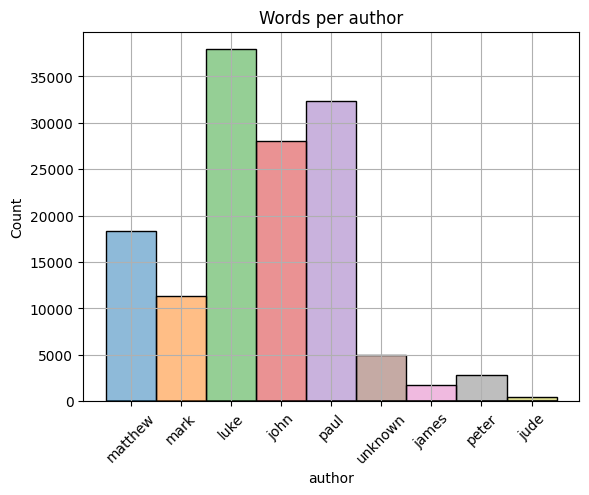

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.histplot(df, x="author", hue="author", legend=False)
plt.grid()
plt.title("Words per author")
plt.xticks(rotation=45)
plt.show()

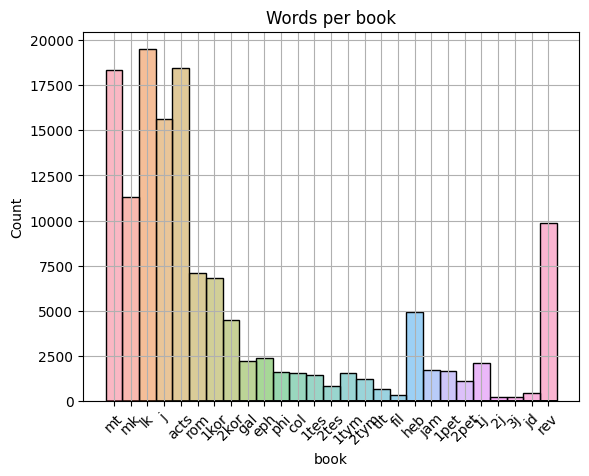

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.histplot(df, x="book", hue="book", legend=False)
plt.grid()
plt.title("Words per book")
plt.xticks(rotation=45)
plt.show()

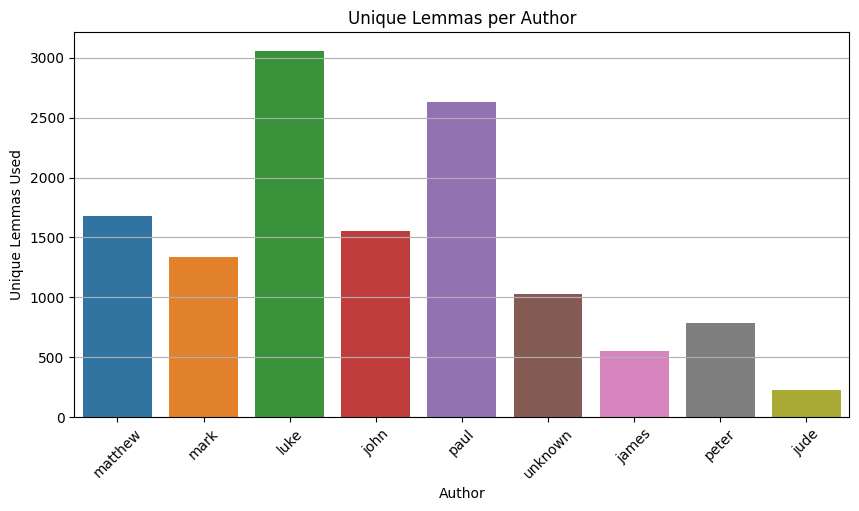

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count unique lemmas per author
author_lemmas = df.groupby("author", sort=False)["lemma"].nunique().reset_index()

# Plot histogram
plt.figure(figsize=(10, 5))
plt.grid()
sns.barplot(x="author", y="lemma", hue="author", data=author_lemmas)

plt.xlabel("Author")
plt.ylabel("Unique Lemmas Used")
plt.title("Unique Lemmas per Author")
plt.xticks(rotation=45)

plt.show()


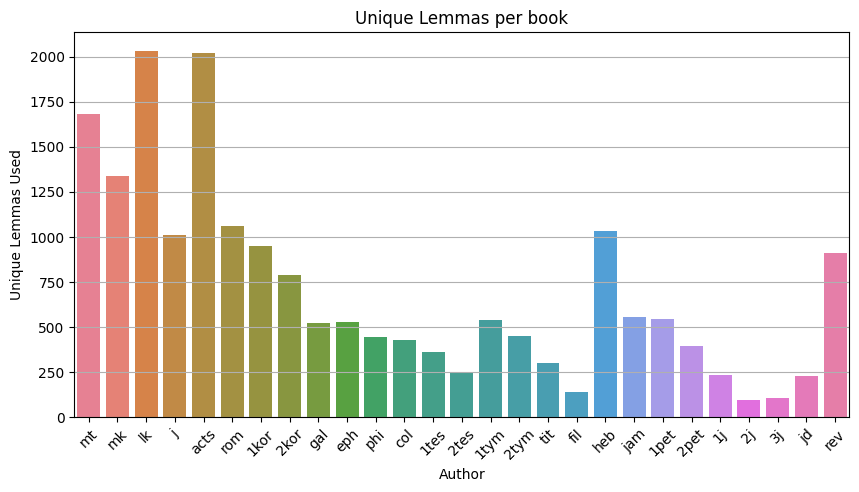

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count unique lemmas per book
author_lemmas = df.groupby("book", sort=False)["lemma"].nunique().reset_index()

# Plot histogram
plt.figure(figsize=(10, 5))
plt.grid()
sns.barplot(x="book", y="lemma", hue="book", data=author_lemmas)

plt.xlabel("Author")
plt.ylabel("Unique Lemmas Used")
plt.title("Unique Lemmas per book")
plt.xticks(rotation=45)

plt.show()

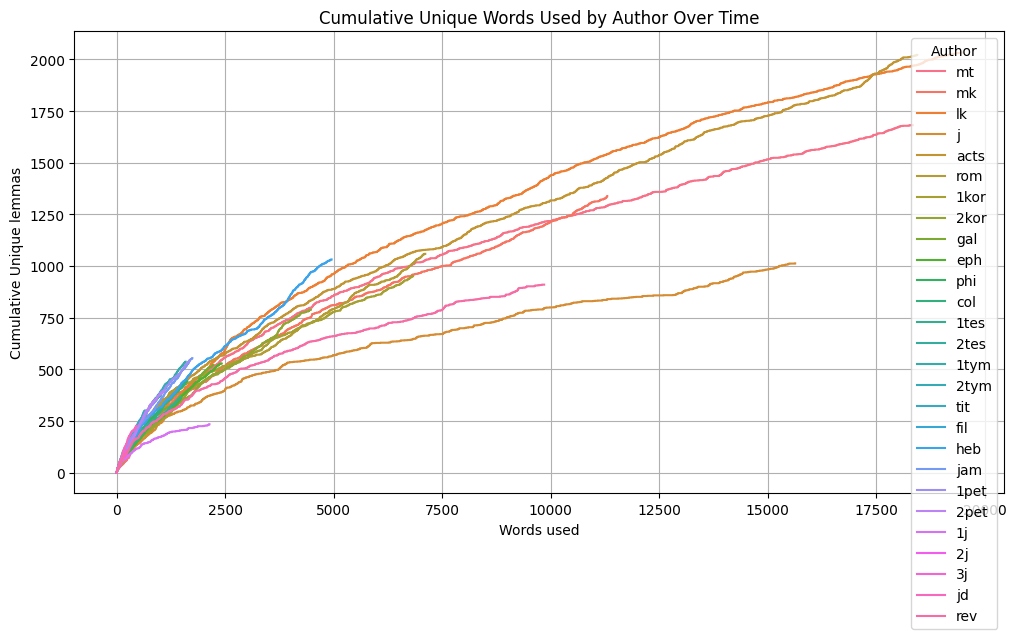

In [26]:
df["b_pos"] = df.groupby("book", sort=False).cumcount() + 1


df["b_unq"] = ~df.duplicated(subset = ["book", "lemma"])
df["b_unq"] = df.groupby("book", sort=False)["b_unq"].cumsum()

# Plot the progression
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="b_pos", y="b_unq", hue="book")

plt.xlabel("Words used")
plt.ylabel("Cumulative Unique lemmas")
plt.title("Cumulative Unique Words Used by Author Over Time")
plt.legend(title="Author")
plt.grid()
plt.show()


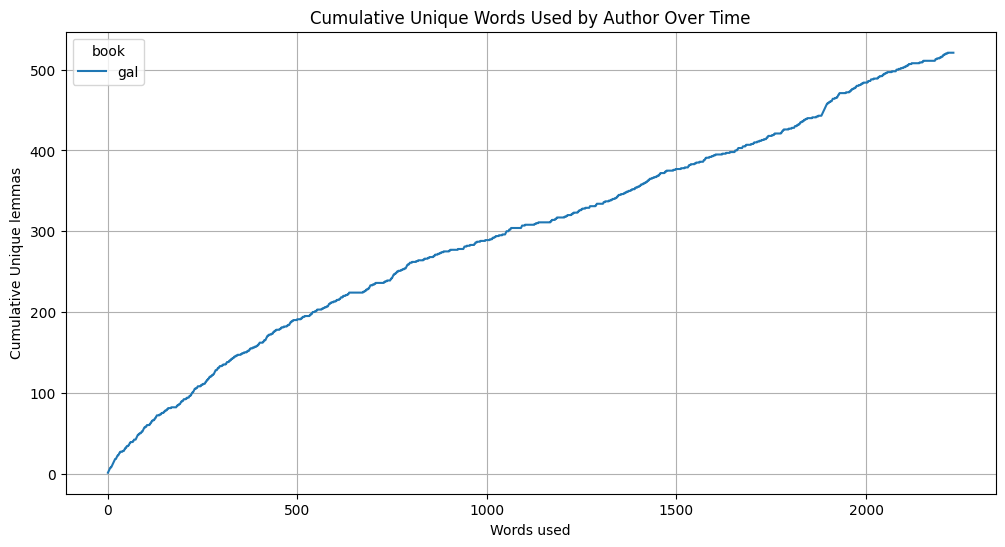

In [27]:
book = "gal"

# Plot the progression
plt.figure(figsize=(12, 6))
sns.lineplot(data=df[df["book"] == book], x="b_pos", y="b_unq", hue="book")

plt.xlabel("Words used")
plt.ylabel("Cumulative Unique lemmas")
plt.title("Cumulative Unique Words Used by Author Over Time")
# plt.legend(title="Author")
# plt.xticks(df["chapter"])
plt.grid()
plt.show()

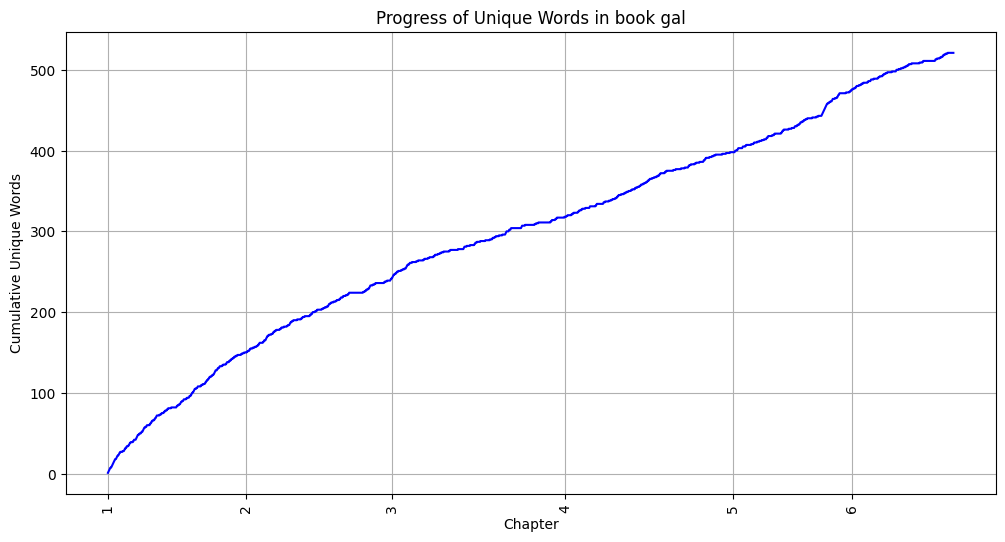

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select one book (e.g., "Book A")
book_df = df[df["book"] == book].copy()

# Compute position within the book
book_df["b_pos"] = range(1, len(book_df) + 1)

# Compute cumulative unique words
book_df["b_unq"] = ~book_df.duplicated(subset=["lemma"])
book_df["b_unq"] = book_df["b_unq"].cumsum()

# Get first position of each chapter for x-ticks
chapter_positions = book_df.groupby("chapter")["b_pos"].first()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=book_df, x="b_pos", y="b_unq", color="b")

# Set x-ticks to chapter positions
plt.xticks(ticks=chapter_positions, labels=chapter_positions.index, rotation=90)

plt.xlabel("Chapter")
plt.ylabel("Cumulative Unique Words")
plt.title(f"Progress of Unique Words in book {book}")
plt.grid()
plt.show()
